In [ ]:
#if run locally or colab
import os
drive_path = ""
kit_ml_dir = "/KIT ML/Fenotypizace - vzchazeni"
if os.path.isdir("/Volumes/GoogleDrive/Shared drives"):
    drive_path = "/Volumes/GoogleDrive/Shared drives"
elif os.path.isdir("G:/Shared drives"):
    drive_path = "G:/Shared drives"
elif not os.path.isdir(drive_path):
    from google.colab import drive
    drive.mount('/content/gdrive')
    drive_path = "/content/gdrive/Shareddrives"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


TADY VÝSTUP PRINTU DRIVE PATH Z COLABU, JE TO JEDINÁ PROMĚNNÁ, KTEROU MOŽNÁ BUDEŠ MUSET PŘENASTAVIT, VŠECHNY OSTATNÍ SE ODVÍJÍ OD TETO CESTY

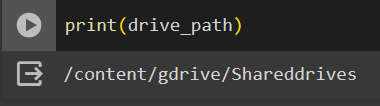

In [ ]:
print(drive_path)

/content/gdrive/Shareddrives


In [ ]:
gdrive_path = drive_path +"/" # TOHLE MOŽNÁ ZMĚNIT netuším, jak se připojí pc ke googlu

base_dire = gdrive_path+"KIT ML 2/Data/temp/" # tady nejduležitější proměnná

name= "detect" # tohle jméno radši neměnit neměnit

save_path=base_dire+"runs/"

path_to_model = gdrive_path + "KIT ML 2/Code/Final/2. Object detection/models/better_plants_1.1.pt"

orig_data_path = gdrive_path + "/KIT ML 2/Data/1-TraysSegmentation/segmented/"

label_path = save_path+"detect/labels"

output_csv_path = base_dire +"output.csv"

small_b_csv = base_dire +"small_b.csv"

final_csv = base_dire +'output2.csv'

path_of_csv = gdrive_path+"KIT ML 2/Data/cropped75/bounding_boxes/"

conf=0.6

print(gdrive_path)
print("")
print(base_dire)
print("")
print(name)
print("")
print(save_path)
print("")
print(path_to_model)
print("")
print(orig_data_path)
print("")
print(label_path)
print("")
print(output_csv_path)
print("")
print(final_csv)
print("")
print(conf)
print("")
print("")

/content/gdrive/Shareddrives/

/content/gdrive/Shareddrives/KIT ML 2/Data/temp/

detect

/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/

/content/gdrive/Shareddrives/KIT ML 2/Code/Final/2. Object detection/models/better_plants_1.1.pt

/content/gdrive/Shareddrives//KIT ML 2/Data/1-TraysSegmentation/segmented/

/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels

/content/gdrive/Shareddrives/KIT ML 2/Data/temp/output.csv

/content/gdrive/Shareddrives/KIT ML 2/Data/temp/output2.csv

0.6




#IMPORTS

ultralytics se poslední dobou dlouho instaluje (v google colabu 5-10 min)

In [ ]:
HOME = os.getcwd()
print(HOME)
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

from IPython.display import display, Image
from PIL import Image
import shutil
import glob
import io

import numpy as np
import pandas as pd
import csv

import os
import shutil
import cv2


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


# FUNCTIONS

In [ ]:
def predictImgsSINGLEDirectory(path_to_model, path_to_imgs, conf,save_path,name):
    data_path = path_to_imgs
    model_path = path_to_model
    confi = conf
    project=save_path

    #!yolo task=detect mode=predict model=$model_path conf=$confi source=$data_path save=True save_txt=True max_det=1 save_conf=True line_thickness=1 hide_labels=True hide_conf=True

    results = model.predict(
        source=path_to_imgs,
        save=True,
        project=project,
        name=name,
        conf=confi,
        save_txt=True,
        max_det=5,
        save_conf=True,
        line_thickness=1,
        hide_labels=True,
        hide_conf=True
        )
    print(project)
    print(name)

    #adresa = path_to_imgs  # Update this address as needed
    # parts = adresa.split("/")[-2:]
    # last_two_folders = "-".join(parts)
    # new_folder = "/content/runs/detect/{}".format(last_two_folders)

    # os.rename(old_folder, new_folder) # Rename folder

def img_size(file_name,orig_data_path):
    img_name = file_name
    shards = img_name.split("_")
    shards[2] = shards[2].replace(".txt", "")
    img_path = orig_data_path + "Tray_" + shards[0] + "/" + shards[2] + "/" + img_name
    img_path = img_path.replace(".txt", ".png")

    img = Image.open(img_path)
    #print(img_path)
    width, height = img.size
    return width, height

def create_csv(label_path,output_csv_path):
    #label_path = save_path+"detect/labels"
    #output_csv_path = base_dire +"output.csv"
    header = ['name', 'center_x', 'center_y', 'width', 'height','conf']

    # Získání seznamu názvů souborů v adresáři
    file_names = os.listdir(label_path)

    # Inicializace prázdného seznamu pro data CSV
    csv_data = []

    # Procházení souborů v adresáři
    for file_name in file_names:
        file_path = os.path.join(label_path, file_name)



        # Otevření souboru a čtení jeho obsahu
        with open(file_path, 'r') as file:
            content = file.read()
            parts = content.split()

            # Pokud máte jistotu, že obsah souboru obsahuje alespoň 4 části
            content1 = parts[1]
            content2 = parts[2]
            content3 = parts[3]
            content4 = parts[4]
            content5 = parts[-1]
            #print(content5)


        # Přidání názvu souboru a jeho obsahu do seznamu pro CSV
        csv_data.append([file_name, content1, content2, content3, content4,content5])

    # Zápis do CSV souboru
    with open(output_csv_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(header)
        csv_writer.writerows(csv_data)

def csvAddingSize(output_csv_path, final_csv):
    input_file_path = output_csv_path
    #final_csv = base_dire +'output2.csv'

    # Open the original CSV file for reading and a new file for writing
    with open(input_file_path, 'r') as input_file, open(final_csv, 'w', newline='') as output_file:
        csv_reader = csv.reader(input_file)
        csv_writer = csv.writer(output_file)

        # Write the header to the output file
        header = next(csv_reader)
        header.append('real_width')
        header.append('real_height')
        header.append('real_center_x')
        header.append('real_center_y')
        header.append('bb_width')
        header.append('bb_height')
        csv_writer.writerow(header)
        for row in csv_reader:
            file_name=row[0]
            width, height = img_size(file_name,orig_data_path)
            #new_column_value ="xx"
            row.append(width)
            row.append(height)
            smth1=float(row[1])*float(width)
            row.append(smth1)
            smth2=float(row[2])*float(height)
            row.append(smth2)
            smth3=float(row[3])*float(width)
            row.append(smth3)
            smth4=float(row[4])*float(height)
            row.append(smth4)
            csv_writer.writerow(row)

def save_adress(img_path):
    img_path = img_path

    parts = img_path.split("/")
    #print(parts[-1])

    shards = parts[-1].split("_")
    shards[-1]=shards[-1].replace(".png", "")

    save_adress = gdrive_path + "/KIT ML 2/Data/cropped75/Tray_"+shards[-3] + "/" + shards[-1] + "/"
    #print(save_adress)

    if not os.path.exists(save_adress):
        os.makedirs(save_adress)

    save_adress_full = save_adress + parts[-1]
    #print(save_adress_full)
    return save_adress_full

def print_folders_with_images(folder):
    directory_paths = []
    for root, dirs, files in os.walk(folder):
        for directory in dirs:
            directory_path = os.path.join(root, directory)
            png_files = [file for file in os.listdir(directory_path) if file.endswith('.png')]

            if png_files:
                # print(f"Folder containing images with .png extension: {directory_path}")
                directory_paths.append(directory_path)
    directory_paths.sort()
    return directory_paths

def finding_BB(final_csv):
    csv_file_path = final_csv

    max_conf = float('-inf')  # Inicializace na nejmenší možnou hodnotu
    best_name = None  # Inicializace pro uchování názvu řádku s největší hodnotou conf

    # Otevření CSV souboru a procházení řádků
    with open(csv_file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)

        for row in csv_reader:
            # Převedení hodnot na číselné hodnoty
            conf_value = float(row['conf'])
            bb_width = float(row['bb_width'])
            bb_height = float(row['bb_height'])
            smallBox = str(row['smallBox'])

            # Podmínka: bb_width a bb_height jsou menší než 55
            if bb_width < 55 and bb_height < 55 and smallBox == "yes":
                # Podmínka: Aktuální hodnota conf je větší než dosud nalezená maximální hodnota
                if conf_value > max_conf:
                    max_conf = conf_value
                    best_name = row['name']
                    best_center_x = row["center_x"]
                    best_center_y = row["center_y"]
                    best_width = row["real_width"]
                    best_height = row["real_height"]

    # Výpis největší hodnoty conf a odpovídajícího názvu
    #print("Největší hodnota conf, kde bb_width < 55 a bb_height < 55:", max_conf)
    if best_name is not None:
        return best_name, best_center_x, best_center_y, best_width, best_height
        #print(best_name)
        #print(best_center_x)
        #print(best_center_y)
        #print(best_width)
        #print(best_height)

def cropping_img(best_name, best_center_x, best_center_y, best_width, best_height,orig_data_path):
    img_name= best_name
    base_dir= orig_data_path
    shards = img_name.split("_")
    shards[2] = shards[2].replace(".txt", "")
    img_path= base_dir +"Tray_"+ shards[0] + "/" + shards[2] + "/"
    #img_path=img_path.replace(".txt", ".png")

    # Specify the path to the folder with images
    folder_path = img_path

    # Get the list of files in the folder
    file_list = os.listdir(folder_path)

    # Filter files with the .png extension
    png_files = [file for file in file_list if file.endswith('.png')]

    # Print the absolute paths to the files
    absolute_paths = [os.path.join(folder_path, file) for file in png_files]

    # Print the absolute paths
    #print(absolute_paths)

    for img in absolute_paths:
        # Cesta k obrázku
        img_path = img

        # Nastavení velikosti výřezu
        crop_size = (75, 75)
        bb_center_x = float(best_center_x)
        bb_center_y = float(best_center_y)
        img_h = float(best_height)
        img_w = float(best_width)

        # Souřadnice středu výřezu
        center_x = int(bb_center_x * img_w)
        center_y = int(bb_center_y * img_h)

        # Načtení obrazku
        image = cv2.imread(img_path)

        # Určení souřadnic levého horního rohu výřezu
        top_left_x = max(center_x - crop_size[0] // 2, 0)
        top_left_y = max(center_y - crop_size[1] // 2, 0)

        # Vytvoření výřezu
        cropped_image = image[top_left_y:top_left_y + crop_size[1], top_left_x:top_left_x + crop_size[0]]

        # Cesta pro uložení výřezu
        save_adress_full = save_adress(img_path)
        output_path = save_adress_full
        #print(save_adress_full)

        # Uložení výřezu
        cv2.imwrite(output_path, cropped_image)

def delete(base_dire,save_path):
    useless_folder = save_path
    useless_csv = base_dire +"output.csv"
    useless_csv2 = base_dire +"output2.csv"
    useless_csv3 = base_dire +"output3.csv"
    useless_csv4 = base_dire +"small_b.csv"

    # Odstranění složky a jejího obsahu
    try:
        shutil.rmtree(useless_folder, ignore_errors=True)
    except FileNotFoundError:
        pass

    # Odstranění souborů
    try:
        os.remove(useless_csv)
    except FileNotFoundError:
        pass

    try:
        os.remove(useless_csv2)
    except FileNotFoundError:
        pass
    try:
        os.remove(useless_csv3)
    except FileNotFoundError:
        pass
    try:
        os.remove(useless_csv4)
    except FileNotFoundError:
        pass

import csv

def finding_BB_CSV(final_csv):
    csv_file_path = final_csv
    output_file_path = base_dire + "output3.csv"

    max_conf = float('-inf')
    best_name = None

    with open(csv_file_path, 'r') as input_csvfile, open(output_file_path, 'w', newline='') as output_csvfile:
        csv_reader = csv.DictReader(input_csvfile)
        csv_writer = csv.writer(output_csvfile)

        header = next(csv_reader)
        header.update({"best": "best"})  # Přidání nové položky "best" do slovníku header
        csv_writer.writerow(header.keys())  # Získání klíčů z hlavičky jako první řádek
        count_b = 0
        check=False

        for row in csv_reader:
            conf_value = float(row['conf'])
            bb_width = float(row['bb_width'])
            bb_height = float(row['bb_height'])
            smallBox = str(row['smallBox'])

            if bb_width < 55 and bb_height < 55 and smallBox == "yes":
                if conf_value > max_conf:
                    max_conf = conf_value
                    best_name = row['name']
                    best_center_x = row["center_x"]
                    best_center_y = row["center_y"]
                    best_width = row["real_width"]
                    best_height = row["real_height"]
                    count_b += 1
                    check=True
            if (check==True):
                row.update({"best": count_b})  # Přidání nové položky "best" do řádku
                check=False
            else:
                row.update({"best": "0"})
            csv_writer.writerow(row.values())  # Získání hodnot řádku a jejich zápis

    if best_name is not None:
        return best_name, best_center_x, best_center_y, best_width, best_height


# Načtení CSV souboru
def csv_write(best_name):
    mirror = best_name.split("_")
    output_name= path_of_csv + mirror[0]+"/" + mirror[-1].replace(".txt", "") + ".csv"

    folder_path= path_of_csv + mirror[0] + "/"
    if not os.path.exists(folder_path):
        # Vytvoření složky, pokud neexistuje
        os.makedirs(folder_path)

    with open(base_dire+'output3.csv', mode='r') as file:
        reader = csv.reader(file)
        data = list(reader)

    # Najití největší hodnoty v sloupci
    column_index = 13  # Index sloupce, ve kterém chcete provést operaci
    column_values = []

    for row in data:
        try:
            value = float(row[column_index])
            column_values.append(value)
        except ValueError:
            # Pokud hodnota není číselná, ignorujeme ji
            pass

    max_value = max(column_values)

    # Nahrazení hodnot
    for row in data:
        try:
            value = float(row[column_index])
            if value == max_value:
                row[column_index] = '1'
            else:
                row[column_index] = '0'
        except ValueError:
            # Pokud hodnota není číselná, ponecháme ji beze změny
            pass

    # Uložení změn do nového CSV souboru
    with open(output_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

def bb_adding_smallbox(final_csv):

    csv_file_path = final_csv

    # Nastavení názvu souboru CSV
    soubor = csv_file_path

    # Načtení dat ze souboru CSV do pandas DataFrame
    data = pd.read_csv(soubor)

    # Vytvoření sloupce 'best' na základě podmínky
    data['smallBox'] = data.apply(lambda row: 'yes' if row['bb_width'] <= 55 and row['bb_height'] <= 55 else 'no', axis=1)

    # Uložení upraveného DataFrame zpět do souboru CSV
    data.to_csv(soubor, index=False)

    # Výpis upraveného DataFrame
    #print("Upravený DataFrame:")
    #print(data)

import shutil
from distutils.dir_util import copy_tree

def copy_temp():
    dest_dir = "/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp"
    os.makedirs(dest_dir, exist_ok=True)
    copy_tree("/content/gdrive/Shareddrives/KIT ML 2/Data/temp", dest_dir)

def bb_smallBox_edit(final_csv, small_b_csv):
    input_file = final_csv
    output_file = small_b_csv
    with open(input_file, 'r') as input, open(output_file, 'w', newline='') as output:
            reader = csv.reader(input)
            writer = csv.writer(output)

            # Write the header to the output file
            header = next(reader)
            writer.writerow(header)

            box = "x"
            boxAlready = False
            for row in reader:
                box = str(row[12])
                if (boxAlready == True):
                    row[12] = "no"  # Přepsání hodnoty na "no" ve sloupci "smallBox"

                if (box=="no"):
                    boxAlready = True

                writer.writerow(row)


    # Po dokončení operací zkopírujeme obsah dočasného souboru na původní soubor
    os.replace(output_file, input_file)

# EXECUTION

## tohle vyřeže vše, ale už je hotový tray 10

In [ ]:
folder = gdrive_path+"KIT ML 2/Data/1-TraysSegmentation/segmented"

#toto vypíše všechny podsložky ve složce
directory_paths = print_folders_with_images(folder)


#conf=0.6
model = YOLO(path_to_model)
delete(base_dire,save_path)

for item in directory_paths:
    delete(base_dire,save_path)
    path_to_imgs= item
    predictImgsSINGLEDirectory(path_to_model, path_to_imgs, conf,save_path,name)
    try:
        #copy_temp() KOPIROVANI SLOŽKY TEMP
        create_csv(label_path,output_csv_path)
        csvAddingSize(output_csv_path,final_csv)
        bb_adding_smallbox(final_csv)
        bb_smallBox_edit(final_csv, small_b_csv=small_b_csv)
        best_name, best_center_x, best_center_y, best_width, best_height = finding_BB(final_csv)
        finding_BB_CSV(final_csv)
        csv_write(best_name)
        cropping_img(best_name, best_center_x, best_center_y, best_width, best_height,orig_data_path)
        delete(base_dire,save_path)
    except Exception as e:
        print(f"An error occurred: {e}")
        continue


## zde pouze tray 10

In [ ]:
folder = gdrive_path+"KIT ML 2/Data/1-TraysSegmentation/segmented/Tray_10"

#toto vypíše všechny podsložky ve složce
directory_paths = print_folders_with_images(folder)


#conf=0.6
model = YOLO(path_to_model)
delete(base_dire,save_path)

for item in directory_paths:
    delete(base_dire,save_path)
    path_to_imgs= item
    predictImgsSINGLEDirectory(path_to_model, path_to_imgs, conf,save_path,name)
    try:
        #copy_temp() KOPIROVANI SLOŽKY TEMP
        create_csv(label_path,output_csv_path)
        csvAddingSize(output_csv_path,final_csv)
        bb_adding_smallbox(final_csv)
        bb_smallBox_edit(final_csv, small_b_csv=small_b_csv)
        best_name, best_center_x, best_center_y, best_width, best_height = finding_BB(final_csv)
        finding_BB_CSV(final_csv)
        csv_write(best_name)
        cropping_img(best_name, best_center_x, best_center_y, best_width, best_height,orig_data_path)
        delete(base_dire,save_path)
    except Exception as e:
        print(f"An error occurred: {e}")
        continue






Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
36 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
24 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
27 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
32 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
31 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
30 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
26 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
29 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
32 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
24 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
35 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
26 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
35 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
30 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
27 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
27 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
36 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
10 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
26 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
33 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
35 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
36 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
35 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
0 label saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect
An error occurred: cannot unpack non-iterable NoneType object


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
25 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
30 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
24 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
26 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
33 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
26 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
24 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
33 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
36 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
28 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
29 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
29 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
32 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
23 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
36 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
31 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
45 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
4 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
33 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
25 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
27 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
24 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
40 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
33 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
26 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
60 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
33 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
35 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
33 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
29 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
36 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
33 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
28 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
43 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


# TADY DÁL ZBYTEČNÝ VĚCI, JAKO MAZÁNÍ A TAK, NENI DULEZITE

In [ ]:
folder = gdrive_path+"KIT ML 2/Data/1-TraysSegmentation/segmented/"

directory_paths = ["/content/gdrive/Shareddrives/KIT ML 2/Data/1-TraysSegmentation/segmented/Tray_10/1-2"]


#conf=0.6
model = YOLO(path_to_model)
delete(base_dire,save_path)

for item in directory_paths:
    delete(base_dire,save_path)
    path_to_imgs= item
    predictImgsSINGLEDirectory(path_to_model, path_to_imgs, conf,save_path,name)
    try:
        create_csv(label_path,output_csv_path)
        csvAddingSize(output_csv_path,final_csv)
        bb_adding_smallbox(final_csv)
        best_name, best_center_x, best_center_y, best_width, best_height = finding_BB(final_csv)
        finding_BB_CSV(final_csv)
        csv_write(best_name)
        cropping_img(best_name, best_center_x, best_center_y, best_width, best_height,orig_data_path)
        #delete(base_dire,save_path)
    except Exception as e:
        print(f"An error occurred: {e}")
        continue

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Results saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect
34 labels saved to /content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/detect/labels


/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs/
detect


místo mazání temp, kopírovat to do jedné složky na disk

In [ ]:
useless_folder = "/content/gdrive/Shareddrives/KIT ML 2/Data/numpy/cropped64-bad_annot"


# Odstranění složky a jejího obsahu
try:
    shutil.rmtree(useless_folder, ignore_errors=True)
except FileNotFoundError:
    pass

In [ ]:
useless_folder = "/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/runs/detect"


# Odstranění složky a jejího obsahu
try:
    shutil.rmtree(useless_folder, ignore_errors=True)
except FileNotFoundError:
    pass

In [ ]:
source_folder = "/content/gdrive/Shareddrives/KIT ML 2/Data/temp"
destination_folder = "/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp"

shutil.copytree(source_folder, destination_folder)

FileExistsError: [Errno 17] File exists: '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp'

In [ ]:
from distutils.dir_util import copy_tree
copy_tree("/content/gdrive/Shareddrives/KIT ML 2/Data/temp", "/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp")

DistutilsFileError: could not create '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/runs/detect/labels/10_26-11-21-18-00-02_1-2.txt': No such file or directory

In [ ]:
from distutils.dir_util import copy_tree
copy_tree("/content/gdrive/Shareddrives/KIT ML 2/Data/temp/runs", "/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp")

['/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/detect/labels/10_26-11-21-18-00-02_1-2.txt',
 '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/detect/labels/10_26-11-21-20-00-01_1-2.txt',
 '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/detect/labels/10_26-11-21-22-00-01_1-2.txt',
 '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/detect/labels/10_27-11-21-00-00-01_1-2.txt',
 '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/detect/labels/10_27-11-21-02-00-01_1-2.txt',
 '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/detect/labels/10_27-11-21-04-00-01_1-2.txt',
 '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/detect/labels/10_27-11-21-06-00-01_1-2.txt',
 '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/detect/labels/10_27-11-21-08-00-01_1-2.txt',
 '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/temp/detect/labels/10_27-11-21-10-00-02_1-2.txt',
 '/content/gdrive/Shareddrives/KIT ML 2/Data/cropped75/